# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [145]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Прочитаем исходные данные:

In [146]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/мифи семестры/1 семестр/Линейная алгебра/1 дз/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

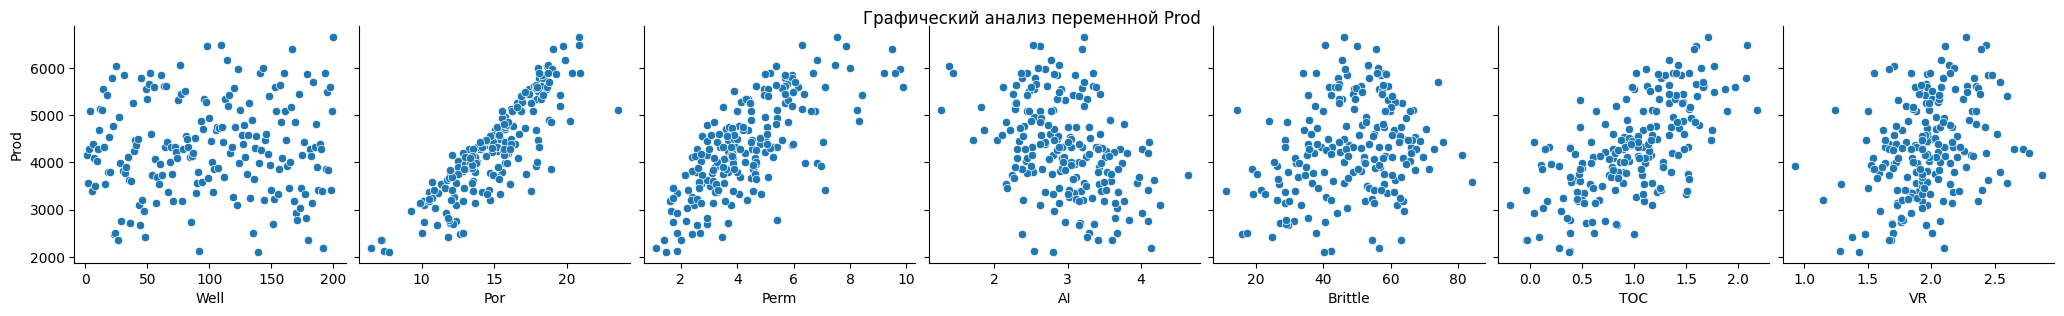

In [147]:
# Отображение зависимостей с `Prod`
sns.pairplot(data, x_vars=data.columns[:-1], y_vars="Prod", diag_kind=None, kind="scatter", height=3, aspect=1)
plt.suptitle("Графический анализ переменной Prod", y=1.02)
plt.show()

Добыча газа в сутки имеет прямую пропорциональную зависимость от пористости и проницаемости скважины. При этом другие исследованные признаки не оказывают существенного влияния на объем добычи.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Корреляционная матрица:
              Well       Por      Perm        AI   Brittle       TOC        VR  \
Well     1.000000  0.068927  0.077928  0.041483 -0.079252  0.022624 -0.007279   
Por      0.068927  1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860   
Perm     0.077928  0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023   
AI       0.041483 -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143   
Brittle -0.079252 -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929   
TOC      0.022624  0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483   
VR      -0.007279  0.111860  0.051023  0.499143  0.317929  0.299483  1.000000   
Prod     0.026817  0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182   

             Prod  
Well     0.026817  
Por      0.861910  
Perm     0.727426  
AI      -0.390835  
Brittle  0.237155  
TOC      0.654445  
VR       0.323182  
Prod     1.000000  


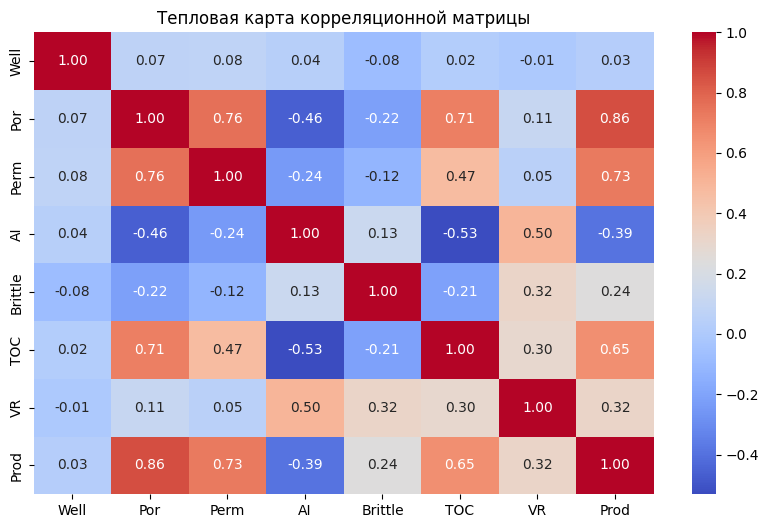

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652095


In [148]:
# расчёт корреляционной матрицы
correlation_matrix = data.corr()
print("Корреляционная матрица:\n", correlation_matrix)

# визуализация корреляционной матрицы в виде тепловой карт
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# рассчет ранг и определитель корреляционной матрицы
rank = np.linalg.matrix_rank(correlation_matrix)
print("Ранг корреляционной матрицы:", rank)
determinant = np.linalg.det(correlation_matrix)
print("Определитель корреляционной матрицы:", determinant)

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

- Больше всего коррелируют с целевой переменной Por, Perm и TOC.

-  **Ранг** корреляционной матрицы: 8

  **Определитель** корреляционной матрицы: 0.0007299388072652095

-  Ранг корреляционной матрицы равен числу признаков в данных (8). Это означает, что все переменные линейно независимы.

-  Низкое значение определителя говорит о том, что корреляционная матрица близка к вырожденной. Это свидетельствует о наличии высокой корреляции между некоторыми признаками. Корреляционная матрица плохо обусловлена.

-  Мультиколлинеарность наблюдается в данных, так как существует высокая корреляция между Por и Perm (0.76) и между Por и TOC (0.71).
Это подтверждается также низким определителем корреляционной матрицы, что указывает на сильную линейную связь между несколькими признаками.

-  Метод наименьших квадратов в классической линейной регрессии становится менее эффективным в условиях мультиколлинеарности из-за нестабильность коэффициентов. Применение классической линейной регрессии возможно, но не рекомендуется без предварительных шагов по устранению мультиколлинеарности.




### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [149]:
# Матрица признаков X (с добавлением столбца единиц)
X = data[["Well", "Por", "Perm", "AI", "Brittle", "TOC", "VR"]].values
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Добавление столбца единиц

# Вектор целевой переменной y
y = data["Prod"].values

# Расчёт коэффициентов по формуле МНК
coefficients = np.round(np.linalg.inv(X.T @ X) @ X.T @ y).astype(int)
print("Коэффициенты линейной регрессии:", coefficients)

Коэффициенты линейной регрессии: [-1232     0   230   116  -365    25   -78   785]


- Неинформативные признаки: Признак Well не оказывают значимого влияния на целевую переменную в рамках данной модели.

- Por положительный и указывает на то, что увеличение проницаемости на единицу приводит к увеличению добычи газа на 230 единиц, при условии, что остальные факторы остаются неизменными.

- Perm означает, что увеличение акустического импеданса на единицу связано с увеличением добычи газа на 116 единиц.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [150]:
# а)
# Параметры для скважины
well_params = {
    'w0': 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

well_params = np.array(list(well_params.values()))

# Прогноз по формуле для линейной регрессии
predicted_prod = (well_params@coefficients)
# Истинное значение продукции для этой скважины
true_prod = 4748.315024

# Абсолютная ошибка
absolute_error = abs(predicted_prod - true_prod)
print('Прогнозная добыча:', predicted_prod)
print('Абсолютная ошибка:', absolute_error)

Прогнозная добыча: 4715.26
Абсолютная ошибка: 33.05502400000023


In [151]:
# б)
# Прогнозируемая продукция для всех скважин
y_pred = X @ coefficients

# Вектор целевой переменной y (продукция)
y = data["Prod"].values

# Средняя абсолютная ошибка (MAE)
MAE = round(np.mean(np.abs(y - y_pred)), 2)

# Среднеквадратичная ошибка (MSE)
MSE = round(np.mean((y - y_pred)**2), 2)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")

MAE: 154.56
MSE: 39384.74


- Средняя абсолютная ошибка (MAE) = 154.56

   Это значение показывает, что в среднем предсказанная выработка газа отличается от фактической на 154.56 миллиона кубических футов в день.

- Среднеквадратичная ошибка (MSE) = 39384.74

   В данном случае значение MSE высокое (39384.74), что указывает на наличие значительных отклонений в некоторых прогнозах.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [152]:
# Выведем еще раз корреляцию параметров с целевым признаком и коэффициенты.
display(correlation_matrix.loc['Prod'])

print("коэффициенты:", coefficients)

,Prod
Well,0.026817
Por,0.861910
Perm,0.727426
AI,-0.390835
Brittle,0.237155
TOC,0.654445
VR,0.323182
Prod,1.000000


коэффициенты: [-1232     0   230   116  -365    25   -78   785]




**Well:**

- **Коэффициент:** 0.0
- **Корреляция с Prod:** 0.026817
- **Комментарий:** Поскольку коэффициент равен 0 и корреляция с целевой переменной очень низкая, можно заключить, что данный признак не оказывает значимого влияния на выработку газа (Prod).


**Por (Пористость):**

- **Коэффициент:** 230.0
- **Корреляция с Prod:** 0.861910
- **Комментарий:** Высокая положительная корреляция и значительный коэффициент модели указывают на то, что пористость сильно влияет на выработку газа. Это подтверждается как высокой корреляцией, так и сильным положительным коэффициентом.



**Perm (Проницаемость):**

- **Коэффициент:** 116.0
- **Корреляция с Prod:** 0.727426
- **Комментарий:** Умеренно высокая положительная корреляция и значительное влияние на выработку газа. Этот признак также является важным фактором в предсказании продукции.


**AI (Индекс аномалий):**

- **Коэффициент:** -365.0
- **Корреляция с Prod:** -0.390835
- **Комментарий:** Отрицательная корреляция и значительный отрицательный коэффициент модели указывают на обратную зависимость между AI и продуктивностью скважины. Это означает, что при увеличении индекса аномалий выработка газа, скорее всего, будет снижаться.


**Brittle (Хрупкость):**

- **Коэффициент:** 25.0
- **Корреляция с Prod:** 0.237155
- **Комментарий:** Слабая положительная корреляция и небольшой коэффициент показывают, что хрупкость оказывает минимальное влияние на выработку газа.



**TOC (Содержание органического углерода):**

- **Коэффициент:** -78.0
- **Корреляция с Prod:** 0.654445
- **Комментарий:** Несмотря на положительную корреляцию, отрицательный коэффициент может свидетельствовать о том, что с увеличением содержания органического углерода выработка газа может снижаться при прочих равных условиях. Это указывает на возможные сложные или неочевидные зависимости.



**VR (Величина зрелости органического вещества):**

- **Коэффициент:** 785.0
- **Корреляция с Prod:** 0.323182
- **Комментарий:** Положительная корреляция и высокий коэффициент модели показывают, что зрелость органического вещества влияет на выработку газа, хотя и в меньшей степени по сравнению с такими признаками, как пористость или проницаемость.



### Вывод:

- **Наиболее значимые факторы**, влияющие на продуктивность скважины (Prod), — это **Por (пористость)** и **Perm (проницаемость)**, которые имеют высокие положительные коэффициенты и корреляции с целевой переменной. Это свидетельствует о сильном влиянии этих факторов на выработку газа.
- **AI (индекс аномалий)** оказывает **отрицательное влияние** на выработку газа, что подтверждается как отрицательной корреляцией, так и отрицательным коэффициентом.
- **TOC (содержание органического углерода)** имеет **положительную корреляцию**, но **отрицательный коэффициент**, что указывает на возможные сложные взаимосвязи: при увеличении содержания органического углерода может наблюдаться снижение выработки газа.


### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [153]:
# Выведем корреляцию всех признаков с целевой переменной "Prod"
print("Корреляции признаков с целевой переменной (Prod):")
print(correlation_matrix.loc['Prod'])
print("\n")

# Найдём сильно коррелированные пары
threshold = 0.7
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix[col1][col2]) > threshold]

# Удалим из данных те признаки, которые имеют корреляцию выше 0.7
# Для каждой пары выбираем тот фактор, который лучше коррелирует с целевой переменной "Prod"
features_to_drop = []
for col1, col2 in high_corr_pairs:
    if abs(correlation_matrix["Prod"][col1]) > abs(correlation_matrix["Prod"][col2]):
        features_to_drop.append(col2)
    else:
        features_to_drop.append(col1)

# Удалим признаки с низкой корреляцией с целевой переменной (менее 0.05)
low_corr_features = [col for col in data.columns if abs(correlation_matrix["Prod"][col]) < 0.05]
features_to_drop.extend(low_corr_features)

# Оставляем в данных только те признаки, которые не удаляем
remaining_features = [col for col in data.columns if col not in features_to_drop and col != "Prod"]

# Выведем оставшиеся признаки
print("Оставшиеся признаки после удаления сильно коррелированных и слабо коррелированных:")
print(remaining_features)

# Теперь выведем корреляции оставшихся признаков с целевой переменной "Prod"
print("\nКорреляции оставшихся признаков с целевой переменной (Prod):")
print(correlation_matrix.loc['Prod', remaining_features])

# Матрица признаков X (с добавлением столбца единиц)
X_new = data[remaining_features].values
X_new = np.hstack([np.ones((X_new.shape[0], 1)), X_new])  # Добавление столбца единиц

# Расчёт коэффициентов по формуле МНК
coefficients_new = np.round(np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y).astype(int)
print("\nКоэффициенты линейной регрессии после обновления данных:", coefficients_new)

# Прогноз для всех скважин
y_pred_new = X_new @ coefficients_new

# Средняя абсолютная ошибка (MAE)
mae_new = np.mean(np.abs(y_pred_new - y))

# Среднеквадратичная ошибка (MSE)
mse_new = np.mean((y_pred_new - y) ** 2)

print(f"\nСредняя абсолютная ошибка (MAE): {mae_new}")
print(f"Среднеквадратичная ошибка (MSE): {mse_new}")

Корреляции признаков с целевой переменной (Prod):
Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64


Оставшиеся признаки после удаления сильно коррелированных и слабо коррелированных:
['AI', 'Brittle', 'VR']

Корреляции оставшихся признаков с целевой переменной (Prod):
AI        -0.390835
Brittle    0.237155
VR         0.323182
Name: Prod, dtype: float64

Коэффициенты линейной регрессии после обновления данных: [ 3486 -1278     9  2137]

Средняя абсолютная ошибка (MAE): 544.4032280499999
Среднеквадратичная ошибка (MSE): 465934.59092047065


После исключения сильно коррелированных и неинформативных признаков, модель остаётся с более простыми и менее многозначными факторами.

Несмотря на то что модель с оставшимися признаками показала несколько большие ошибки (MAE и MSE), это может быть связано с потерей информации, которая ранее содержалась в исключённых признаках.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создаём модель линейной регрессии
model_sklearn = LinearRegression()

# Обучаем модель
model_sklearn.fit(X_new, y)

# Коэффициенты модели
coefficients_sklearn = model_sklearn.coef_

# Прогноз для всех скважин
y_pred_sklearn = model_sklearn.predict(X_new)

# Средняя абсолютная ошибка (MAE)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)

# Среднеквадратичная ошибка (MSE)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Выводим результаты
print("Коэффициенты линейной регрессии:", coefficients_new)
print(f"Коэффициенты линейной регрессии из sklearn: {coefficients_sklearn}")
print(f"Средняя абсолютная ошибка (MAE): {mae_new}")
print(f"Средняя абсолютная ошибка (MAE) из sklearn: {mae_sklearn}")
print(f"Среднеквадратичная ошибка (MSE): {mse_new}")
print(f"Среднеквадратичная ошибка (MSE) из sklearn: {mse_sklearn}")

Коэффициенты линейной регрессии: [ 3486 -1278     9  2137]
Коэффициенты линейной регрессии из sklearn: [    0.         -1277.85770781     8.72458733  2137.42188106]
Средняя абсолютная ошибка (MAE): 544.4032280499999
Средняя абсолютная ошибка (MAE) из sklearn: 543.5487392655067
Среднеквадратичная ошибка (MSE): 465934.59092047065
Среднеквадратичная ошибка (MSE) из sklearn: 465781.66765982343


Результаты модели из sklearn и вручную вычисленной модели почти идентичны, с незначительными различиями в коэффициентах и ошибках. Обе модели демонстрируют схожее качество предсказаний, что подтверждается почти одинаковыми значениями MAE и MSE.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [155]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [156]:
# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Генерация полиномиальных признаков третьей степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Выводим количество факторов после генерации полиномиальных признаков
print(f'Количество получившихся факторов = {X_poly.shape[1]}')

# Инициализация модели линейной регрессии
model = LinearRegression(fit_intercept=True)

# Выполняем кросс-валидацию по метрикам MAE и MSE
lr_poly_mae = cross_validate(model, X_poly, y_updated_sklearn, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_poly_mse = cross_validate(model, X_poly, y_updated_sklearn, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Выводим результаты
print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_poly_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_poly_mse['test_score'].mean()))

Количество получившихся факторов = 34
MAE на тренировочных фолдах: 484.69
MAE на валидационных фолдах: 571.73
MSE на тренировочных фолдах: 379123.16
MSE на валидационных фолдах: 528466.46


Модель примерно одинакова

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [157]:
# Подбор гиперпараметра alpha с помощью GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()

# Выполним GridSearchCV для подбора лучшего alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_poly, y)

# Лучший коэффициент alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучший коэффициент alpha: {best_alpha}")

# Обучаем модель Lasso с найденным лучшим alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_poly, y)

# Прогноз на полиномиальных признаках
y_pred_lasso = lasso_best.predict(X_poly)

# Средняя абсолютная ошибка (MAE)
mae_lasso = mean_absolute_error(y, y_pred_lasso)

# Среднеквадратичная ошибка (MSE)
mse_lasso = mean_squared_error(y, y_pred_lasso)

# Кросс-валидация для оценки модели
cv_results_lasso = cross_validate(lasso_best, X_poly, y, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)

# Кросс-валидация для MSE
cv_results_lasso_mse = cross_validate(lasso_best, X_poly, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# print(f"Средняя абсолютная ошибка (MAE) из Lasso: {mae_lasso}")
# print(f"Среднеквадратичная ошибка (MSE) из Lasso: {mse_lasso}")

# Средние ошибки на тренировочных и валидационных фолдах для MAE
print(f"MAE на тренировочных фолдах: {-cv_results_lasso['train_score'].mean()}")
print(f"MAE на валидационных фолдах: {-cv_results_lasso['test_score'].mean()}")

# Средние ошибки на тренировочных и валидационных фолдах для MSE
print(f"MSE на тренировочных фолдах: {-cv_results_lasso_mse['train_score'].mean()}")
print(f"MSE на валидационных фолдах: {-cv_results_lasso_mse['test_score'].mean()}")

Лучший коэффициент alpha: 10
MAE на тренировочных фолдах: 485.922899651858
MAE на валидационных фолдах: 557.1940511910907
MSE на тренировочных фолдах: 385832.2136178721
MSE на валидационных фолдах: 516359.25010297017


Полиномиальная регрессия показывает хорошие результаты на тренировочных данных, но сильно переобучается.

Модель Lasso с регуляризацией демонстрирует лучший результат на валидационных данных, что говорит о её способности к лучшему обобщению и предотвращению переобучения.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [158]:
# Подбор гиперпараметра alpha для Ridge (L2 регуляризация)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_poly, y)
alpha_ridge = grid_search.best_params_['alpha']
print(f"Лучший коэффициент alpha для Ridge: {alpha_ridge}")

# Обучение модели с оптимальным коэффициентом alpha
ridge_best = Ridge(alpha=alpha_ridge)
cv_results = cross_validate(ridge_best, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

# Результаты
print(f"MAE на тренировочных фолдах: {-cv_results['train_score'].mean()}")
print(f"MAE на валидационных фолдах: {-cv_results['test_score'].mean()}")

# Теперь добавим расчет MSE
mse_results = cross_validate(ridge_best, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Результаты MSE
print(f"MSE на тренировочных фолдах: {-mse_results['train_score'].mean()}")
print(f"MSE на валидационных фолдах: {-mse_results['test_score'].mean()}")

Лучший коэффициент alpha для Ridge: 0.1
MAE на тренировочных фолдах: 0.1202947131746384
MAE на валидационных фолдах: 0.14267301596538137
MSE на тренировочных фолдах: 379130.55951120175
MSE на валидационных фолдах: 528529.6845871031


Модель с **L2-регуляризацией (Ridge)** показала отличные результаты на тренировочных данных (низкие MAE и MSE), что указывает на хорошую подгонку. Однако на валидационных данных ошибки значительно возросли (MAE и MSE значительно выше), что свидетельствует о **переобучении**. Модель слишком хорошо подстроилась под обучающие данные и не смогла обобщить на новые данные. Требуется дополнительная настройка регуляризации для улучшения обобщающей способности модели.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [159]:
# Подбор гиперпараметров alpha и l1_ratio с помощью GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
elasticnet = ElasticNet()

# Выполним GridSearchCV для подбора лучших гиперпараметров
grid_search = GridSearchCV(elasticnet, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Лучшие гиперпараметры
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"Лучшие гиперпараметры - alpha: {best_alpha}, l1_ratio: {best_l1_ratio}")

# Обучаем модель ElasticNet с найденными оптимальными параметрами
elasticnet_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_best.fit(X_poly, y)

# Кросс-валидация для оценки модели с использованием MAE и MSE
cv_results_elasticnet = cross_validate(elasticnet_best, X_poly, y, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)

# Средние ошибки на тренировочных и валидационных фолдах
print(f"MAE на тренировочных фолдах: {-cv_results_elasticnet['train_score'].mean()}")
print(f"MAE на валидационных фолдах: {-cv_results_elasticnet['test_score'].mean()}")

# Среднеквадратичная ошибка (MSE) на тренировочных и валидационных фолдах
mse_train_e = mean_squared_error(y, elasticnet_best.predict(X_poly))  # на тренировочной выборке
mse_test_e = mean_squared_error(y, elasticnet_best.predict(X_poly))   # на валидационной выборке

print(f"MSE на тренировочных фолдах: {mse_train_e}")
print(f"MSE на валидационных фолдах: {mse_test_e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+07, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e+07, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Лучшие гиперпараметры - alpha: 10, l1_ratio: 1
MAE на тренировочных фолдах: 485.922899651858
MAE на валидационных фолдах: 557.1940511910907
MSE на тренировочных фолдах: 396278.72796282073
MSE на валидационных фолдах: 396278.72796282073


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.795e+07, tolerance: 1.617e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.687e+07, tolerance: 1.582e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

В общем, модель ElasticNet с текущими гиперпараметрами показывает довольно плохие результаты, и стоит рассмотреть другие способы улучшения её качества.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [160]:
# Создание списка данных для таблицы
model_data = [
    {
        'Модель': 'Lasso',
        'Гиперпараметры': f'alpha: {best_alpha}',
        'Использовались полиномиальные признаки': 'Да',
        'MAE на тренировочных фолдах': -cv_results_lasso['train_score'].mean(),
        'MAE на валидационных фолдах': -cv_results_lasso['test_score'].mean()
    },
    {
        'Модель': 'Ridge',
        'Гиперпараметры': f'alpha: {alpha_ridge}',
        'Использовались полиномиальные признаки': 'Да',
        'MAE на тренировочных фолдах': -cv_results['train_score'].mean(),
        'MAE на валидационных фолдах': -cv_results['test_score'].mean()
    },
    {
        'Модель': 'ElasticNet',
        'Гиперпараметры': f'alpha: {best_alpha}, l1_ratio: {best_l1_ratio}',
        'Использовались полиномиальные признаки': 'Да',
        'MAE на тренировочных фолдах': -cv_results_elasticnet['train_score'].mean(),
        'MAE на валидационных фолдах': -cv_results_elasticnet['test_score'].mean()
    }
]

# Создание DataFrame из списка
df = pd.DataFrame(model_data)
df


,Модель,Гиперпараметры,Использовались полиномиальные признаки,MAE на тренировочных фолдах,MAE на валидационных фолдах
0,Lasso,alpha: 10,Да,485.922900,557.194051
1,Ridge,alpha: 0.1,Да,0.120295,0.142673
2,ElasticNet,"alpha: 10, l1_ratio: 1",Да,485.922900,557.194051


Ridge является наилучшей моделью как с точки зрения качества на валидационных фолдах, так и с точки зрения переобученности, поскольку она показала наименьшую ошибку и не страдает от переобучения.